In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import  pyplot as plt 


## Data Exploration and EDA

In [3]:
data = pd.read_csv("train_hsbc_df.csv")
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
1,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
2,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
3,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
4,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,513643.0,94.992629,51.063474,0.0,52.00,97.00,139.00,179.00
amount,513643.0,37.915481,111.557455,0.0,13.74,26.92,42.55,7665.56
fraud,513643.0,0.012071,0.109201,0.0,0.00,0.00,0.00,1.00


In [6]:

def unique_percentage(df):
    object_columns = df.select_dtypes(include=['object']).columns
    results = {}
    
    for col in object_columns:
        total_values = df[col].count()
        unique_values = df[col].nunique()
        percentage = (unique_values / total_values) * 100
        results[col] = f"{percentage:.2f}%"
    
    return results
unique_percentage(data)

{'customer': '0.80%',
 'age': '0.00%',
 'gender': '0.00%',
 'zipcodeOri': '0.00%',
 'merchant': '0.01%',
 'zipMerchant': '0.00%',
 'category': '0.00%'}

In [7]:
df = data.copy()

In [8]:
# Fraud distribution
fraud_dist = df['fraud'].value_counts(normalize=True) * 100
print("\nFraud distribution:")
print(fraud_dist)


Fraud distribution:
fraud
0    98.792936
1     1.207064
Name: proportion, dtype: float64


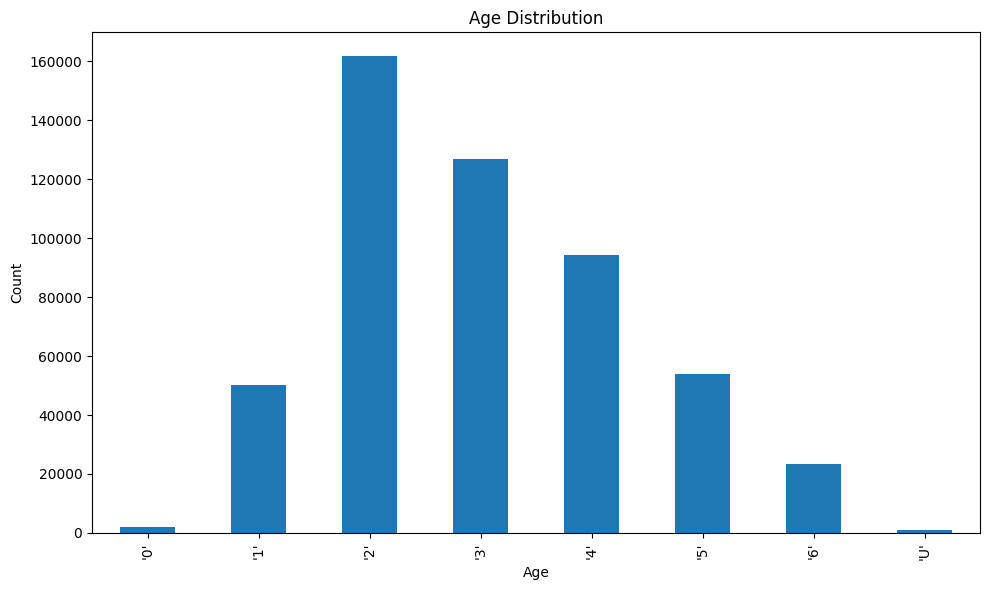

In [9]:
# Age distribution
plt.figure(figsize=(10, 6))
df['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('age_distribution.png')
# plt.close()

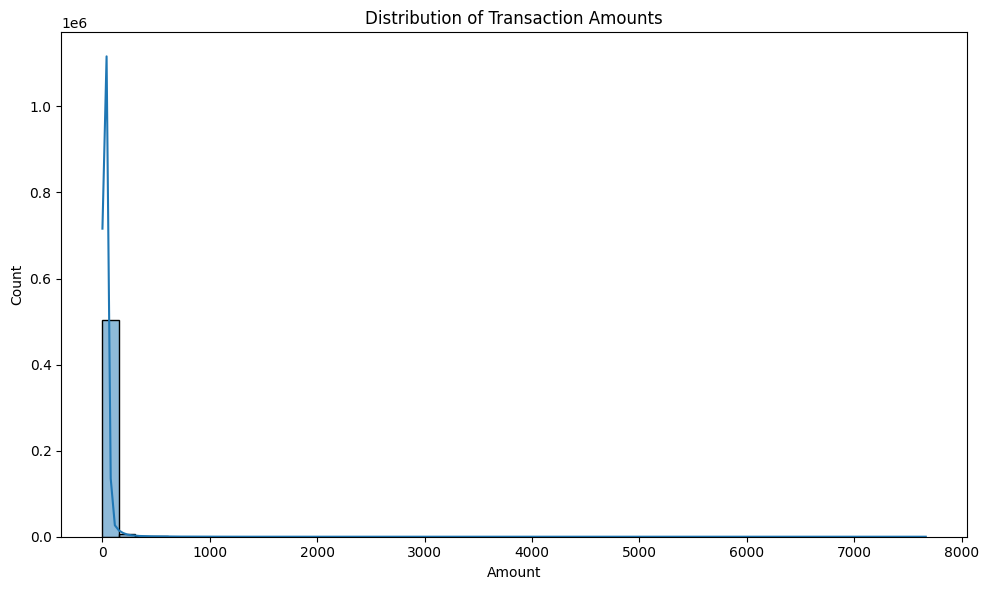

In [10]:
# Amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('amount_distribution.png')
# plt.close()


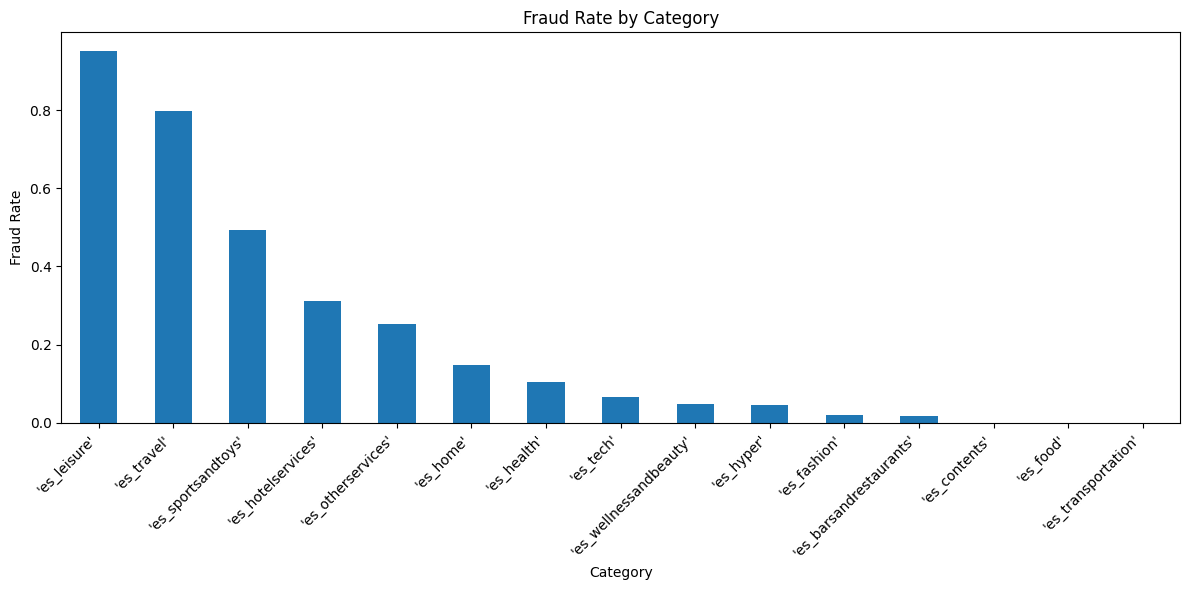

In [11]:
# Fraud by category
fraud_by_category = df.groupby('category')['fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
fraud_by_category.plot(kind='bar')
plt.title('Fraud Rate by Category')
plt.xlabel('Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig('fraud_by_category.png')
# plt.close()

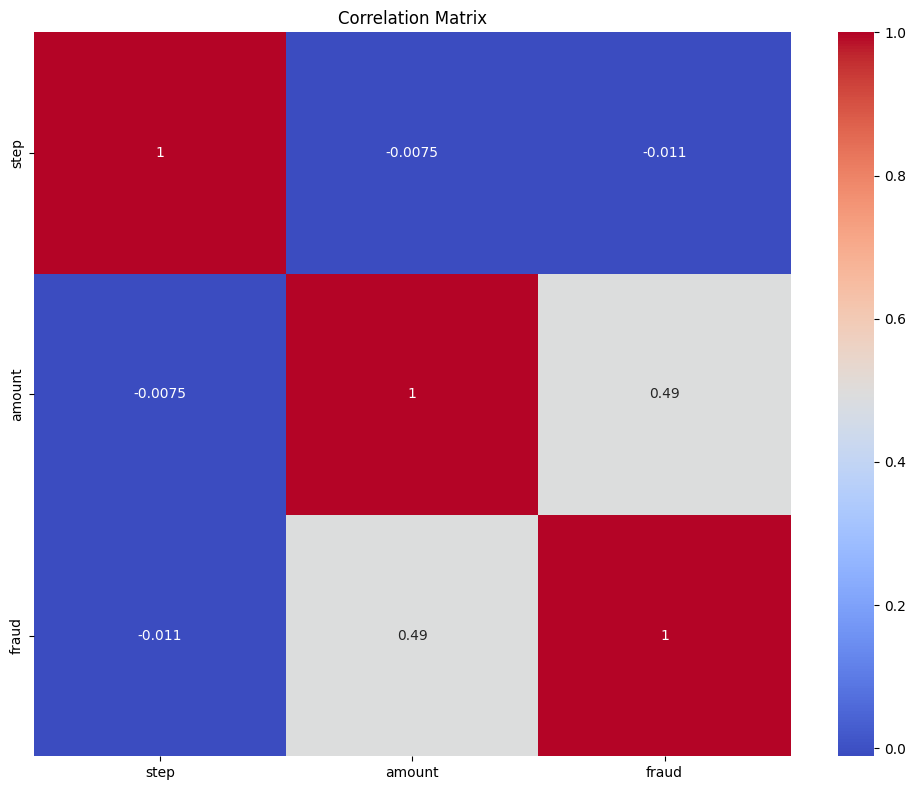

In [12]:
# Correlation matrix for numerical columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
# plt.savefig('correlation_matrix.png')
# plt.close()

In [13]:
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
1,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
2,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
3,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
4,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1
...,...,...,...,...,...,...,...,...,...,...
513638,179,'C748358246','2','M','28007','M1823072687','28007','es_transportation',51.17,0
513639,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
513640,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
513641,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0


In [14]:
data = data.drop("zipMerchant" , axis =1 )

In [15]:
data = data.drop("zipcodeOri" , axis =1 )

In [16]:
data = data.drop("customer" , axis =1 )

In [17]:
data = data.drop("step" , axis =1 )

In [18]:
print(data.shape)


(513643, 6)


In [19]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


ordinal_columns = ['age', 'gender']
ordinal_encoder = OrdinalEncoder()
data[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])

# One-hot encoding for 'merchant' and 'category'
onehot_columns = ['merchant', 'category']
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(data[onehot_columns])

# Get feature names for one-hot encoded columns
feature_names = onehot_encoder.get_feature_names_out(onehot_columns)

# Create a new DataFrame with one-hot encoded features
onehot_data = pd.DataFrame(onehot_encoded, columns=feature_names)

# Combine the original DataFrame with one-hot encoded features
data_encoded = pd.concat([data.drop(columns=onehot_columns), onehot_data], axis=1)

# Print info about the new DataFrame
print(data_encoded.info())

# Optional: If you want to see the mapping for ordinal encoding
for col in ordinal_columns:
    print(f"\nOrdinal encoding mapping for {col}:")
    for category, code in zip(ordinal_encoder.categories_[ordinal_columns.index(col)], range(len(ordinal_encoder.categories_[ordinal_columns.index(col)]))):
        print(f"{category}: {code}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               513643 non-null  float64
 1   gender                            513643 non-null  float64
 2   amount                            513643 non-null  float64
 3   fraud                             513643 non-null  int64  
 4   merchant_'M1053599405'            513643 non-null  float64
 5   merchant_'M117188757'             513643 non-null  float64
 6   merchant_'M1198415165'            513643 non-null  float64
 7   merchant_'M1294758098'            513643 non-null  float64
 8   merchant_'M1313686961'            513643 non-null  float64
 9   merchant_'M1352454843'            513643 non-null  float64
 10  merchant_'M1353266412'            513643 non-null  float64
 11  merchant_'M1400236507'            513643 non-null  f

In [20]:
X , y = data_encoded.drop("fraud" , axis =1  )  , data_encoded["fraud"]

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 68 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               513643 non-null  float64
 1   gender                            513643 non-null  float64
 2   amount                            513643 non-null  float64
 3   merchant_'M1053599405'            513643 non-null  float64
 4   merchant_'M117188757'             513643 non-null  float64
 5   merchant_'M1198415165'            513643 non-null  float64
 6   merchant_'M1294758098'            513643 non-null  float64
 7   merchant_'M1313686961'            513643 non-null  float64
 8   merchant_'M1352454843'            513643 non-null  float64
 9   merchant_'M1353266412'            513643 non-null  float64
 10  merchant_'M1400236507'            513643 non-null  float64
 11  merchant_'M1416436880'            513643 non-null  f

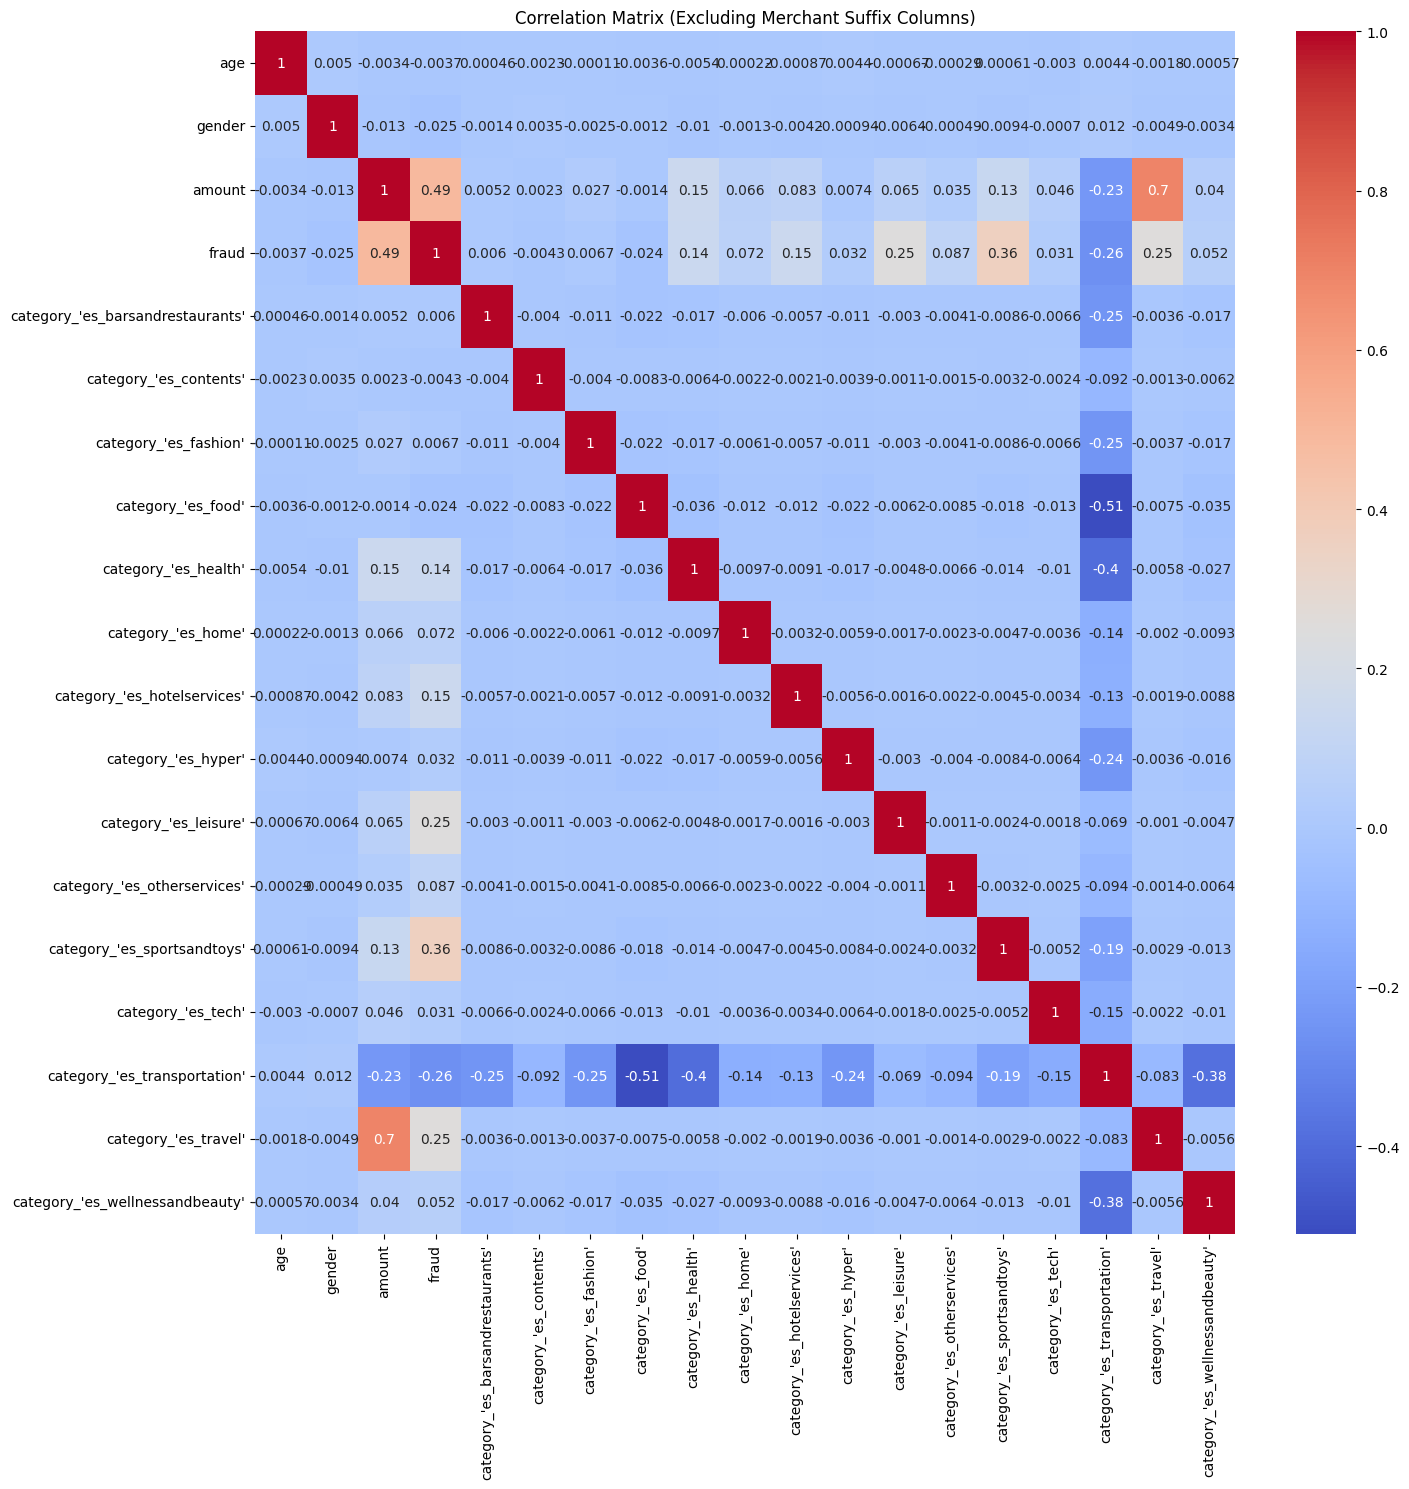

In [22]:
non_merchant_columns = [col for col in data_encoded.select_dtypes(include=['int64', 'float64']).columns if not col.startswith('merchant')]

# Calculate the correlation matrix for the filtered columns
corr_matrix = data_encoded[non_merchant_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Excluding Merchant Suffix Columns)')
plt.tight_layout()
plt.show()

## Qauntiles of Transaction Amount 

In [23]:
print("Transaction Amounts Quantiles:")
print(data['amount'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))


Transaction Amounts Quantiles:
0.010      0.57
0.025      1.39
0.100      5.57
0.250     13.74
0.500     26.92
0.750     42.55
0.900     60.21
0.975    126.89
0.990    236.54
Name: amount, dtype: float64


/home/hrithik2212/HSBC/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


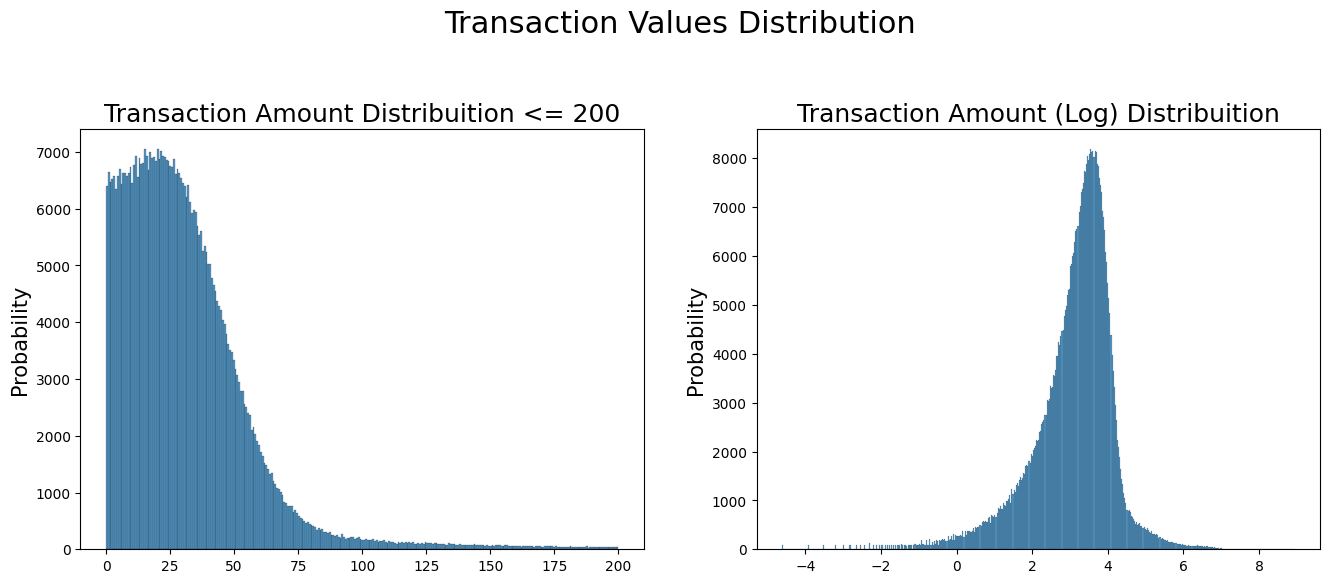

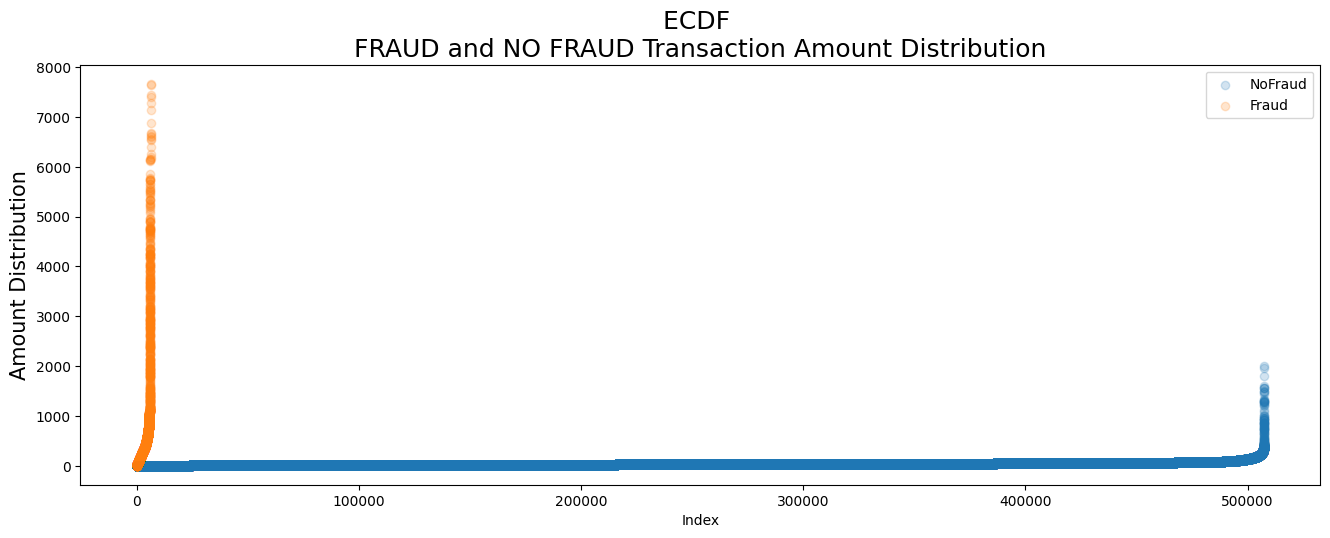

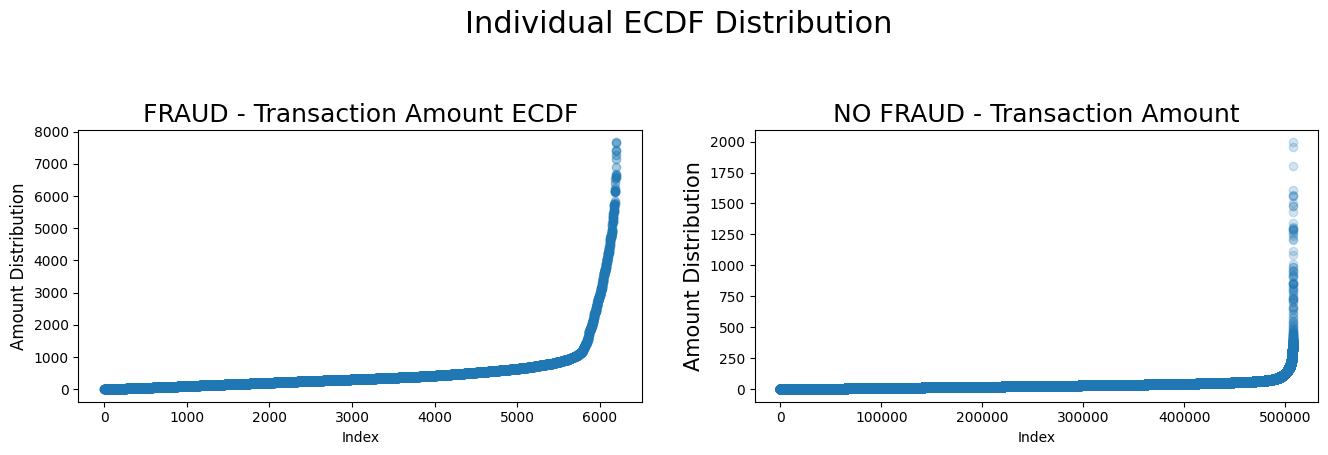

In [24]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
g = sns.histplot(data[data['amount'] <= 200]['amount'])
g.set_title("Transaction Amount Distribuition <= 200", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.histplot(np.log(data['amount']))
g1.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
g1.set_xlabel("")
g1.set_ylabel("Probability", fontsize=15)

plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(data[data['fraud'] == 0].shape[0]),
                 np.sort(data[data['fraud'] == 0]['amount'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(data[data['fraud'] == 1].shape[0]),
                 np.sort(data[data['fraud'] == 1]['amount'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Amount Distribution", fontsize=15)
g4 = plt.legend()

plt.figure(figsize=(16,12))

plt.subplot(321)
g = plt.scatter(range(data[data['fraud'] == 1].shape[0]), 
                 np.sort(data[data['fraud'] == 1]['amount'].values), 
                label='fraud', alpha=.4)
plt.title("FRAUD - Transaction Amount ECDF", fontsize=18) # Empirical Cumulative Distibution Frequency 
plt.xlabel("Index")
plt.ylabel("Amount Distribution", fontsize=12)

plt.subplot(322)
g1 = plt.scatter(range(data[data['fraud'] == 0].shape[0]),
                 np.sort(data[data['fraud'] == 0]['amount'].values), 
                 label='NoFraud', alpha=.2)
g1= plt.title("NO FRAUD - Transaction Amount", fontsize=18)
g1 = plt.xlabel("Index")
g1 = plt.ylabel("Amount Distribution", fontsize=15)

plt.suptitle('Individual ECDF Distribution', fontsize=22)

plt.show()

## Modelling 

In [25]:
from sklearn.model_selection import train_test_split 
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y , shuffle=True )

# Optional: print the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (410914, 68)
X_test shape: (102729, 68)
y_train shape: (410914,)
y_test shape: (102729,)


## Model-1 (XGBoost Tuned towards minimizing false positive)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the 'amount' column only
X['amount'] = scaler.fit_transform(np.log1p(X[['amount']]))

```python
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")
# Initialize the XGBoost classifier with GPU support and verbosity
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    tree_method='gpu_hist',   # Use GPU for training
    predictor='gpu_predictor', # Use GPU for prediction
    verbosity=2,               # Increase verbosity to get more logs
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='precision', 
                           cv=5,  
                           verbose=1,  # Verbose output during GridSearchCV
                           n_jobs=-1)

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# You can now use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Optional: Evaluate the model on the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

```

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: 
- `colsample_bytree`: 0.8
- `learning_rate`: 0.01
- `max_depth`: 9
- `n_estimators`: 100
- `subsample`: 0.8

Best Cross-Validation Accuracy: **0.9500870342880395**

|            | precision | recall | f1-score | support |
|------------|------------|--------|----------|---------|
| **0**      | 1.00       | 1.00   | 1.00     | 101,489 |
| **1**      | 0.96       | 0.62   | 0.75     | 1,240   |

|                    |           |        |          |         | 
|--------------------|-----------|--------|----------|---------|
| **accuracy**       |           |        | 1.00     | 102,729 |
| **macro avg**      | 0.98      | 0.81   | 0.88     | 102,729 |
| **weighted avg**   | 0.99      | 1.00   | 0.99     | 102,729 |


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier to use CPU
xgb_model = XGBClassifier(
    n_estimators=100,         # Number of trees
    max_depth=9,              # Maximum depth of each tree
    learning_rate=0.01,        # Learning rate (shrinkage)
    subsample=0.8,            # Subsample ratio of the training instances
    colsample_bytree=0.8,     # Subsample ratio of columns when constructing each tree
    use_label_encoder=False,  # Disable the use of the label encoder
    eval_metric='logloss',    # Evaluation metric
    tree_method='hist',       # Use histogram-based algorithm on CPU
    predictor='cpu_predictor' # Use CPU for prediction
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/home/hrithik2212/HSBC/venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:49:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9952983091434746
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    101489
           1       0.96      0.64      0.77      1240

    accuracy                           1.00    102729
   macro avg       0.98      0.82      0.88    102729
weighted avg       1.00      1.00      0.99    102729



In [39]:
from joblib import dump

# Save the model to a file
dump(xgb_model, 'xgb_model_1.joblib')


['xgb_model_1.joblib']

## Model 2 (XGBoost model tuned towards predicting on actual fradulent data)

```python
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")
# Initialize the XGBoost classifier with GPU support and verbosity
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    tree_method='gpu_hist',   # Use GPU for training
    predictor='gpu_predictor', # Use GPU for prediction
    verbosity=2,               # Increase verbosity to get more logs
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='recall', 
                           cv=5,  
                           verbose=1,  # Verbose output during GridSearchCV
                           n_jobs=-1)

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# You can now use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Optional: Evaluate the model on the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
```

Fitting 5 folds for each of 108 candidates, totaling 540 fits

**Best Parameters:**
- `colsample_bytree`: 1.0
- `learning_rate`: 0.2
- `max_depth`: 6
- `n_estimators`: 100
- `subsample`: 1.0

**Best Cross-Validation Accuracy:** 0.7725806451612902

|            | precision | recall | f1-score | support  |
|------------|------------|--------|----------|----------|
| **0**      | 1.00       | 1.00   | 1.00     | 101,489  |
| **1**      | 0.88       | 0.77   | 0.82     | 1,240    |

|                    |           |        |          |         | 
|--------------------|-----------|--------|----------|---------|
| **accuracy**       |           |        | 1.00     | 102,729 |
| **macro avg**      | 0.94      | 0.88   | 0.91     | 102,729 |
| **weighted avg**   | 1.00      | 1.00   | 1.00     | 102,729 |


In [31]:
xgb_model_2 = XGBClassifier(
    n_estimators=100,         # Number of trees
    max_depth=6,              # Maximum depth of each tree
    learning_rate=0.2,        # Learning rate (shrinkage)
    subsample=1.0,            # Subsample ratio of the training instances
    colsample_bytree=1.0,     # Subsample ratio of columns when constructing each tree
    use_label_encoder=False,  # Disable the use of the label encoder
    eval_metric='logloss',    # Evaluation metric
    tree_method='hist',       # Use histogram-based algorithm on CPU
    predictor='cpu_predictor' # Use CPU for prediction
)

# Fit the model on the training data
xgb_model_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model_2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/home/hrithik2212/HSBC/venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9958726357698411
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    101489
           1       0.87      0.77      0.82      1240

    accuracy                           1.00    102729
   macro avg       0.94      0.88      0.91    102729
weighted avg       1.00      1.00      1.00    102729



In [40]:
from joblib import dump

# Save the model to a file
dump(xgb_model_2, 'xgb_model_2.joblib')


['xgb_model_2.joblib']

## Model 3 (Randomforest trained to handle outliers and generalization of other models)

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='precision',   # You can change this to 'precision', 'recall', 'f1', etc.
                           cv=5,                 # 5-fold cross-validation
                           verbose=1,            # Verbose output during GridSearchCV
                           n_jobs=-1)            # Utilize all available CPU cores

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

```

## Final Model : Weighted Classfier 

In [59]:
X_test.shape

(102729, 68)

In [32]:

# Get prediction probabilities for both models
y_pred_prob1 = xgb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred_prob2 = xgb_model_2.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Combine the predictions using a weighted average
weight1 = 0.6  # You can adjust these weights based on model performance
weight2 = 0.4
y_pred_prob_weighted = (weight1 * y_pred_prob1) + (weight2 * y_pred_prob2)

# Convert weighted probabilities into final binary predictions
threshold = 0.5
y_pred_weighted = (y_pred_prob_weighted >= threshold).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))

Accuracy: 0.9958629014202416
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    101489
           1       0.92      0.72      0.81      1240

    accuracy                           1.00    102729
   macro avg       0.96      0.86      0.90    102729
weighted avg       1.00      1.00      1.00    102729



In [38]:
print(list(X_test.iloc[0].values))

[np.float64(3.0), np.float64(2.0), np.float64(99.81), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(

In [41]:
y_test.iloc[0]

np.int64(0)

In [58]:
# from sklearn.metrics import confusion_matrix

# def plot_confusion_matrix_percentage(y_true, y_pred):
#     # Compute the confusion matrix
#     cm = confusion_matrix(y_true, y_pred)

#     # Normalize the confusion matrix by row (true labels)
#     cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

#     # Define the labels
#     labels = ['Not Fraud (0)', 'Fraud (1)']

#     # Plot the confusion matrix using seaborn
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title('Confusion Matrix (Percentage)')
#     plt.show()

# # Assuming y_test is the true labels and y_pred_weighted are the predicted labels
# plot_confusion_matrix_percentage(y_test, y_pred_weighted)

## Feature Importance 

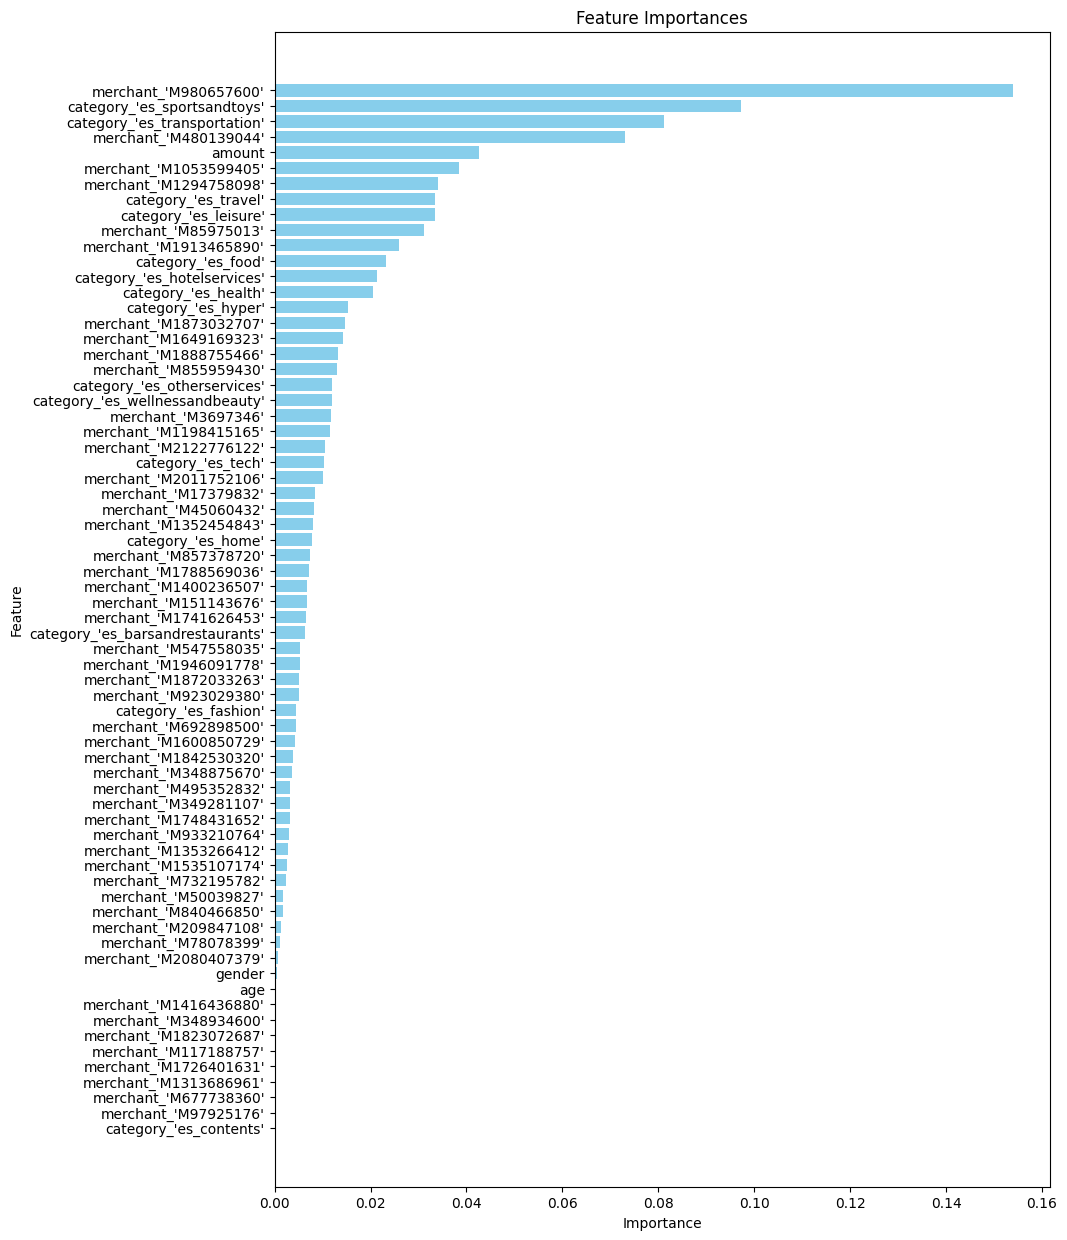

In [44]:
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

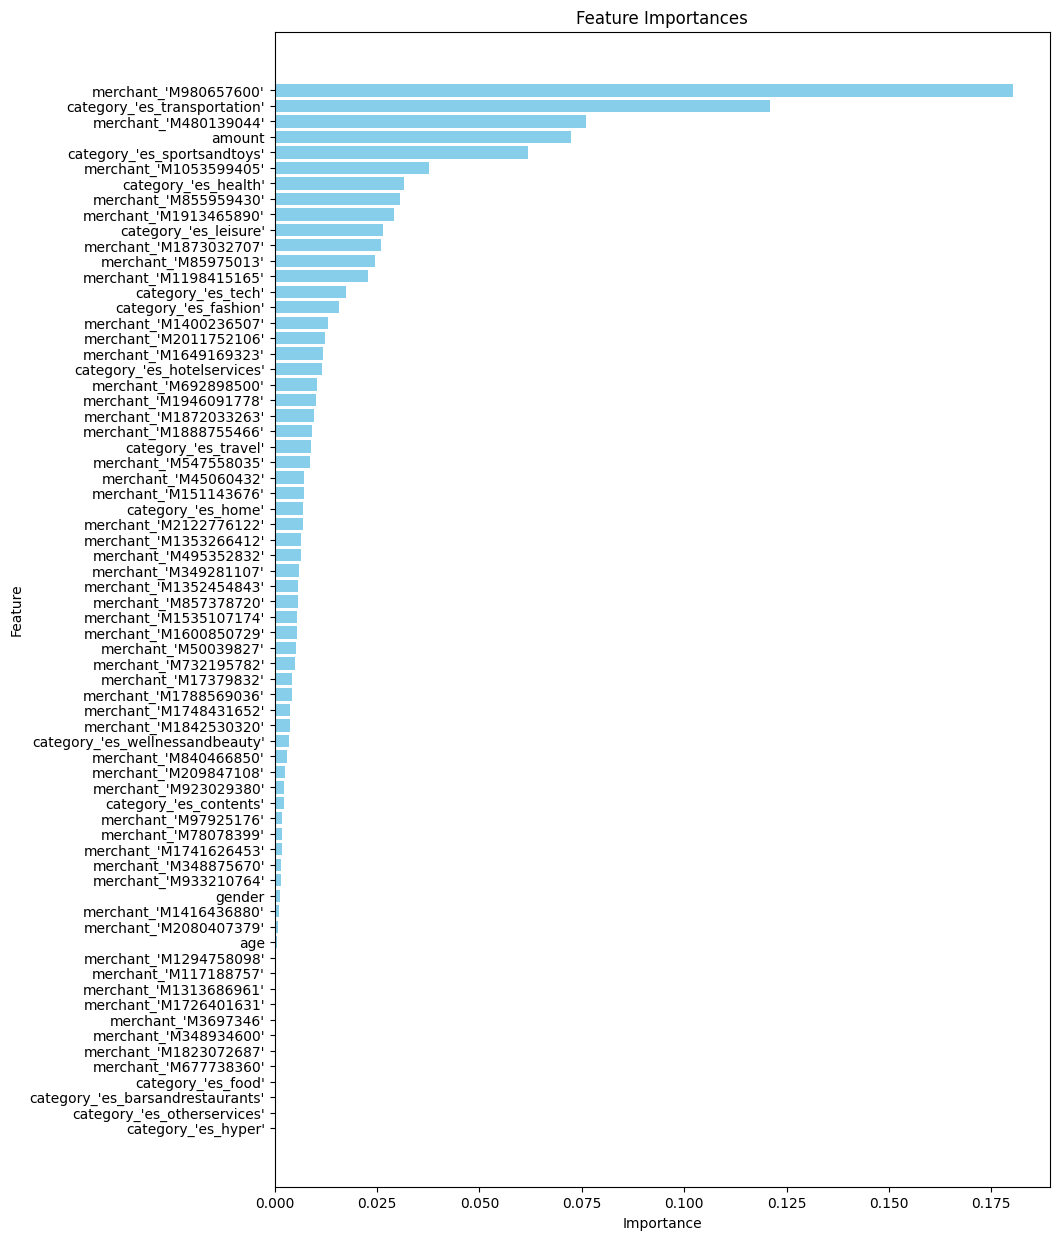

In [45]:
feature_importances = xgb_model_2.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [51]:
df[df['merchant'] == "'M980657600'"]['fraud'].value_counts(normalize=True) * 100

fraud
1    83.355263
0    16.644737
Name: proportion, dtype: float64

In [53]:
df[df['merchant'] == "'M980657600'"]['category'].value_counts(normalize=True) * 100

category
'es_sportsandtoys'    100.0
Name: proportion, dtype: float64

In [55]:
df[df['merchant'] == "'M480139044'"]['fraud'].value_counts(normalize=True) * 100

fraud
0    53.632761
1    46.367239
Name: proportion, dtype: float64

In [61]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from joblib import dump

def train_mlp(csv_path="train_hsbc_df.csv"):
    """
    Will train an MLP model on the given dataset and save the model using joblib
    =============================================
    """
    # Load the data
    data = pd.read_csv(csv_path)
    
    #=================#
    ## Data Cleaning ##
    #=================#
    data = data.drop(["zipMerchant", "zipcodeOri", "customer"], axis=1)
    
    #============================#
    ## Data Feature Engineering ##
    #============================#
    # Ordinal encoding for 'age' and 'gender'
    ordinal_columns = ['age', 'gender']
    ordinal_encoder = OrdinalEncoder()
    data[ordinal_columns] = ordinal_encoder.fit_transform(data[ordinal_columns])
    
    # One-hot encoding for 'merchant' and 'category'
    onehot_columns = ['merchant', 'category']
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(data[onehot_columns])
    
    # Get feature names for one-hot encoded columns
    feature_names = onehot_encoder.get_feature_names_out(onehot_columns)
    
    # Create a new DataFrame with one-hot encoded features
    onehot_data = pd.DataFrame(onehot_encoded, columns=feature_names)
    
    # Combine the original DataFrame with one-hot encoded features
    data_encoded = pd.concat([data.drop(columns=onehot_columns), onehot_data], axis=1)
    
    # Split the data into features and target
    X = data_encoded.drop("fraud", axis=1)
    y = data_encoded["fraud"]
    
    # Standardize the feature matrix
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y , shuffle=True )
    
    #====================#
    ## Model Training ##
    #====================#
    mlp = MLPClassifier(hidden_layer_sizes=(256,512,), max_iter=300, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Save the trained model
    dump(mlp, 'mlp_model.joblib')
    
    #====================#
    ## Model Prediction ##
    #====================#
    y_pred_prob = mlp.predict_proba(X_test)[:, 1]  # Probability of the positive class
    y_pred = (y_pred_prob >= 0.5).astype(int)
    
    #====================#
    ## Model Evaluation ##
    #====================#
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC AUC Score:", roc_auc)
    
train_mlp(csv_path="train_hsbc_df.csv")


Accuracy: 0.9958336983714433
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    101489
           1       0.88      0.76      0.81      1240

    accuracy                           1.00    102729
   macro avg       0.94      0.88      0.91    102729
weighted avg       1.00      1.00      1.00    102729

ROC AUC Score: 0.9978847381839253
